<a href="https://colab.research.google.com/github/lilywright99/scRNAseqtutorial/blob/main/SinglecellRNAsequencinganalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Science - Single Cell RNA sequencing analysis worksheet**

**Initial set up steps**

**1. Change Runtime type to T4 GPU**

**2. Mount your google drive to this google Co-lab session**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**3. Place the downloaded data 'Hufallopiantube.h5ad' into your google drive**
* You can drag and drop this from your downloads file, into the Files file icon on the left, and navigating to 'drive/MyDrive'


**4. Install additional required packages**

In [2]:
!pip install 'scanpy[leiden]'


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.7/141.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 8.3 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=ff08052889da93e50483f910401fe31df546bbf9f9929acf3e0390dfe7a6ce4d
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


**5. Import required packages**

In [4]:
import scanpy as sc
import numpy as np
import pandas as pd

# **1. AnnData as a data object** anndata.svg


We will explore a small single cell RNA sequencing dataset of Fallopian Tube cells. The dataset includes benign samples from 5 patients , and high grade serous ovarian carcinoma (HGOC) samples from 5 patients.

High-grade serous ovarian cancer (HGOC) is the most common and aggressive type of epithelial ovarian cancer.

It is hypothesised to originate from Serous tubal intraepithelial carcinoma (STIC) cells in the fallopian tube.


**1. Read in data to create an Anndata object**


In [75]:
hu = sc.read_h5ad('/content/drive/MyDrive/datascience_course/Hufallopiantube.h5ad')

**2. View the structure of the data**

In [76]:
hu

AnnData object with n_obs × n_vars = 4557 × 22109
    obs: 'Patient', 'Author', 'Tissue', 'Disease_stage', 'Age'

**3. View the meta data**

In [77]:
hu.obs

Patient   Author                       Tissue Disease_stage Age
CellID                                                                       
sc_b1_A08       33572  Hu_2020  Benign fallopian tube cells        Benign  64
sc_b1_B06       34350  Hu_2020  Benign fallopian tube cells        Benign  50
sc_b1_B08       34350  Hu_2020  Benign fallopian tube cells        Benign  50
sc_b1_B11       34350  Hu_2020  Benign fallopian tube cells        Benign  50
sc_b1_C15       34350  Hu_2020  Benign fallopian tube cells        Benign  50
...               ...      ...                          ...           ...  ..
15072R-p1-B17   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62
15072R-p1-B18   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62
15072R-p1-C01   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62
15072R-p1-C02   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62
15072R-p1-C03   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62

[4557 rows x 5 columns]

**4. View the highest expressed genes**

  Using sc.pl.highest_expr_genes(data, n_top=int)

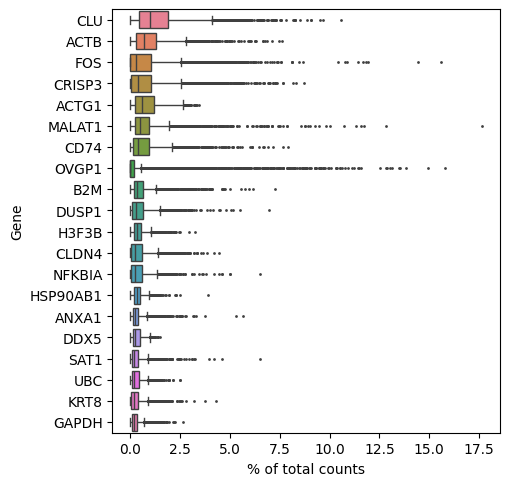

In [78]:
sc.pl.highest_expr_genes(hu, n_top=20)

# **2. Filtering of the data**


**1. Filter out cells which have less than 100 genes expressed, and genes which are expressed in less than 3 cells.**

Use the scanpy commands:

* sc.pp.filter_cells(data, min_genes= *int*)
* sc.pp.filter_genes(data, min_cells= *int*)



In [79]:
sc.pp.filter_cells(hu, min_genes= 200)
sc.pp.filter_genes(hu, min_cells= 3)

**2.Calculate quality control metrics**

* sc.pp.calculate_qc_metrics(data, percent_top=(50,
100, 200, 500),inplace=True, log1p=False, )

In [80]:
sc.pp.calculate_qc_metrics(hu,inplace=True, log1p=False, )


**3. View quality control metrics in a violin plot**
* sc.pl.violin(data, ['n_genes_by_counts','total_counts'],jitter=0.4, multi_panel=True)

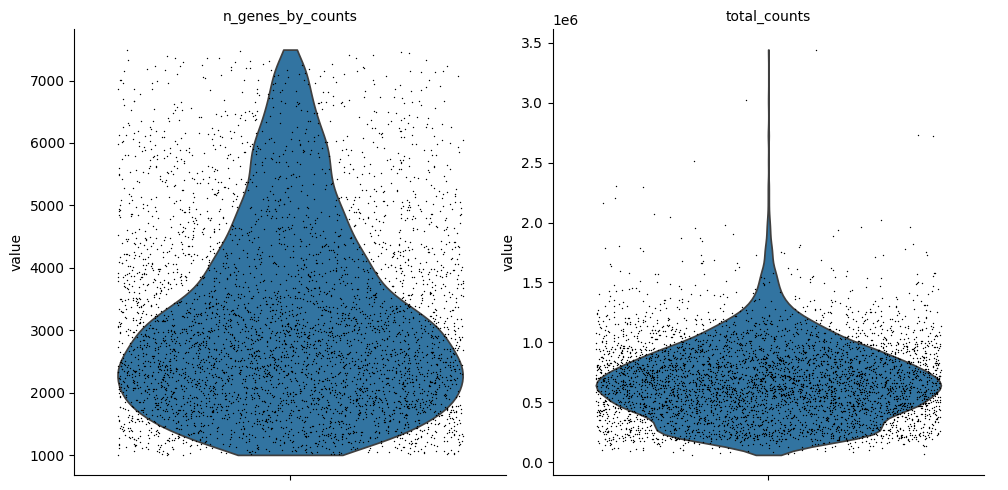

In [81]:
sc.pl.violin(hu, ['n_genes_by_counts','total_counts'],jitter=0.4, multi_panel=True)

**4.Filter the cells further by slicing the anndata object on 'n_genes_by_counts' and 'total_counts'**

For n_genes_by_counts (remove cells with a high number of detected genes) this would be:
* data=data[data.obs.n_genes_by_counts <6000,:]




In [82]:
hu=hu[hu.obs.n_genes_by_counts <6000,:]
hu=hu[hu.obs.total_counts <1500000,:]

**5.View the structure of the data after filtering steps**

In [83]:
hu

View of AnnData object with n_obs × n_vars = 4230 × 20372
    obs: 'Patient', 'Author', 'Tissue', 'Disease_stage', 'Age', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

# **3.Dimensionality Reduction and visualisation**
To plot the data in a UMAP,


1. Initial pre-processing steps:
* Normalise the counts per cell, so each cell has 10,000 counts
* log transform the data

2.   Identify and crop the data to only the highly variable genes, then scale the data
3.   Compute the PCA
4.   Compute the Nearest neighbours graph
5.   Compute the UMAP




**1.Normalise and log transform the data**
* sc.pp.normalize_total(data, target_sum=1e4)
* sc.pp.log1p(data)

In [84]:
sc.pp.normalize_total(hu, target_sum=1e4)
sc.pp.log1p(hu)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


**2.Crop the data to highly variable genes only**
* sc.pp.highly_variable_genes(data, min_mean=0.0125, max_mean=3, min_disp=0.5)
* sc.pl.highly_variable_genes(data)
* data.raw = data
* data = data [:, data.var.highly_variable]
* sc.pp.scale(data, max_value=10)

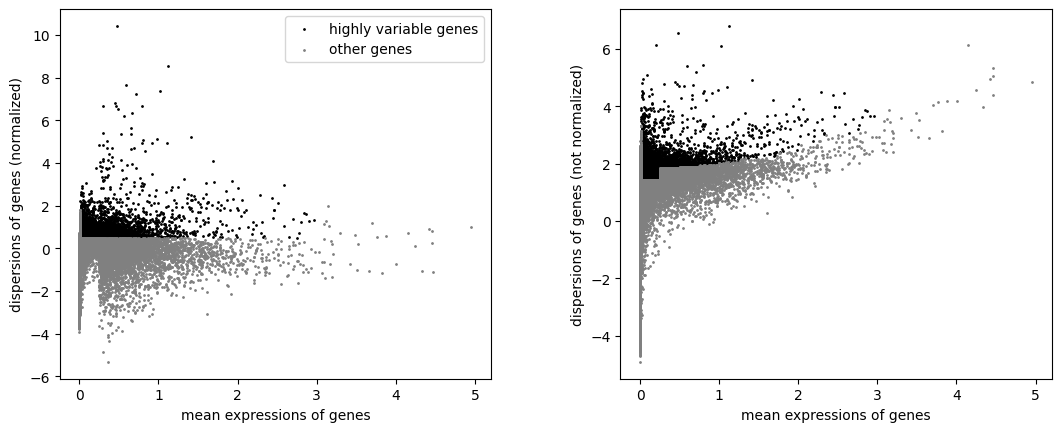

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [85]:
sc.pp.highly_variable_genes(hu, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(hu )
hu.raw = hu
hu = hu [:, hu.var.highly_variable]
sc.pp.scale(hu, max_value=10)

**3.Calculate and plot a principal component analysis (PCA) elbow plot**
* sc.tl.pca(data, svd_solver='arpack')
* sc.pl.pca_variance_ratio(data, log=True)
* sc.pl.pca(data, color=[' '])

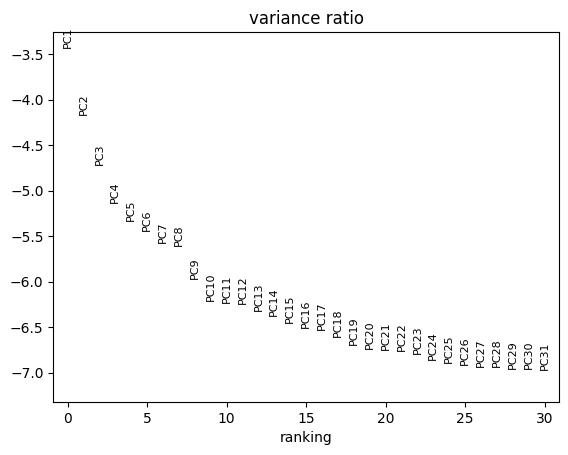

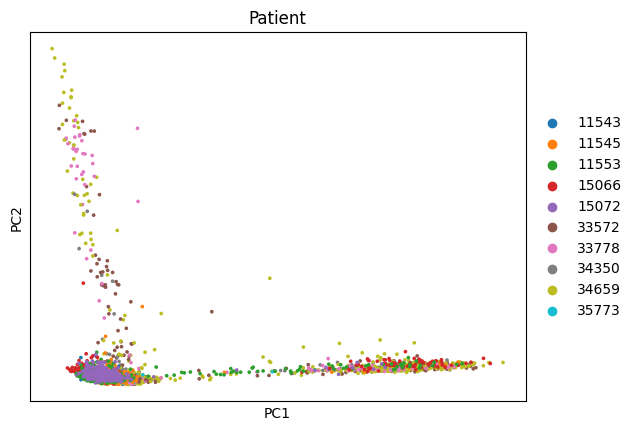

In [86]:
sc.tl.pca(hu, svd_solver='arpack')
sc.pl.pca_variance_ratio(hu, log=True)
sc.pl.pca(hu, color=['Patient'])

**4.Compute the nearest neighbours graph, choose the number of principal components to use based on the elbow of the PCA plot (inflection point)**
 * sc.pp.neighbors(data, n_pcs= )

In [87]:
sc.pp.neighbors(hu, n_pcs=8)

**5.Compute and plot the UMAP**
* sc.tl.umap(data)

Plot the UMAP by Tissue, or another value of.obs columns
* sc.pl.umap(data, color=[''])


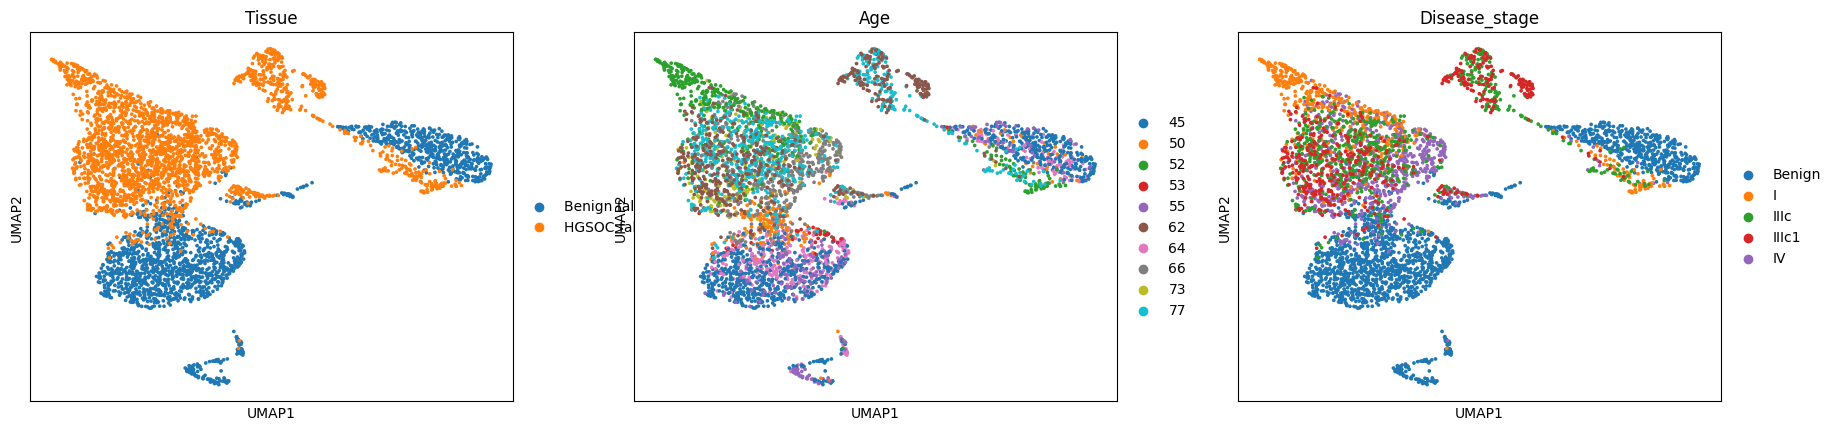

In [88]:
sc.tl.umap(hu)
sc.pl.umap(hu, color=['Tissue','Age','Disease_stage'])


Plot the UMAP in the color of gene expression (use one of the genes from top 20 highly expressed genes)

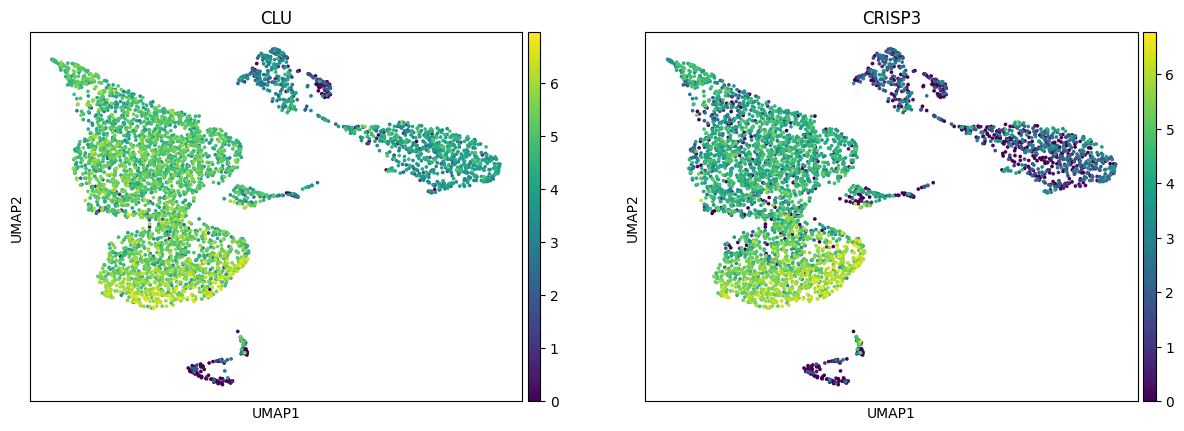

In [89]:
sc.pl.umap(hu, color=['CLU','CRISP3'])

**6.Examine how the UMAP structure changes when you change the number of pcs used to generate the n_neighbours graph**

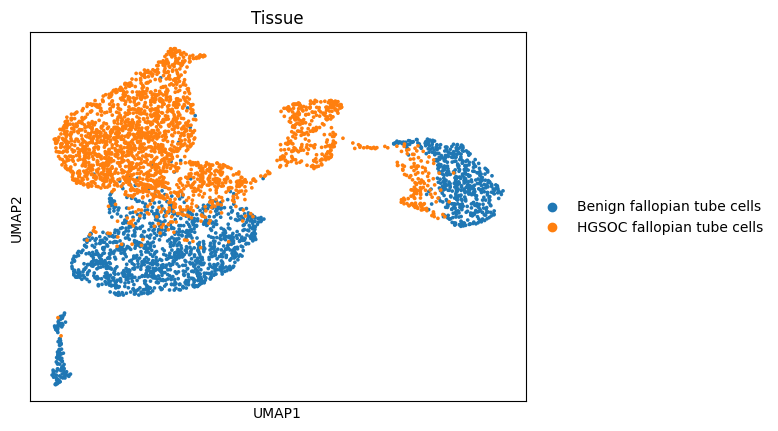

In [90]:
sc.pp.neighbors(hu, n_pcs=5)
sc.tl.umap(hu)
sc.pl.umap(hu, color=['Tissue'])

**7. Re-run the nearest neighbours graph and UMAP with optimal number of PCs**

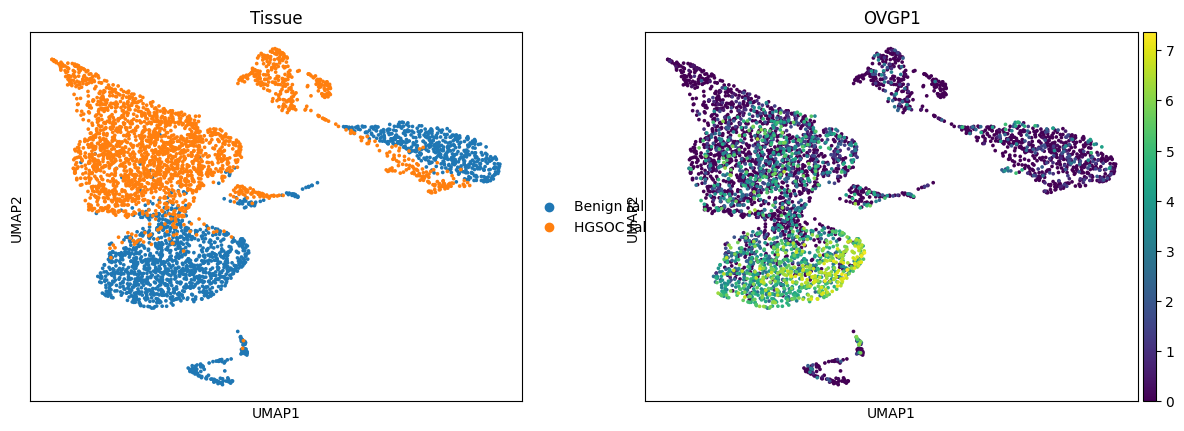

In [91]:
sc.pp.neighbors(hu, n_pcs=8)
sc.tl.umap(hu)
sc.pl.umap(hu, color=['Tissue','OVGP1'])

# **5.Leiden clustering**
Cluster the cells to identify similar groups of cells
* By examining gene expression, determine what type of cells are in each cluster
* Using a dictionary, create a new obs. column assigning a label of cell type to leiden clusters
* Test the top differentially expressed genes in each leiden cluster/cell type
* Plot a heatmap of top differentially expressed genes in each leiden cluster/cell type

**1. Perform leiden clustering, then visualise clusters on the UMAP**
* sc.tl.leiden(data, resolution=0.2)
* sc.pl.umap(data, colour=['Leiden'])

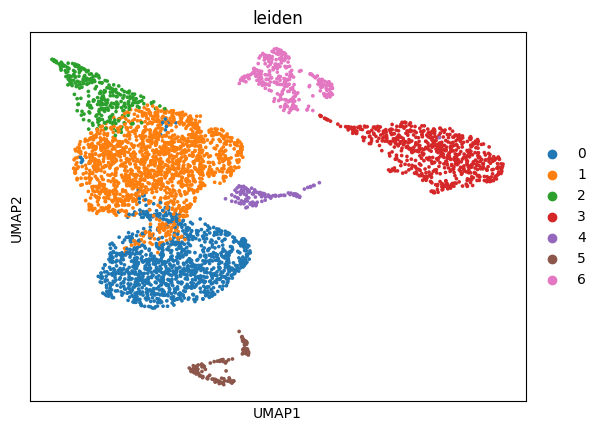

In [92]:
sc.tl.leiden(hu, resolution=0.2,flavor="igraph")
sc.pl.umap(hu, color=['leiden'])

**2. Calculate the top differentially expressed genes in each leiden cluster**
* sc.tl.rank_genes_groups(data,'leiden', method='wilcoxon')
* sc.pl.rank_genes_groups(data, n_genes=25)

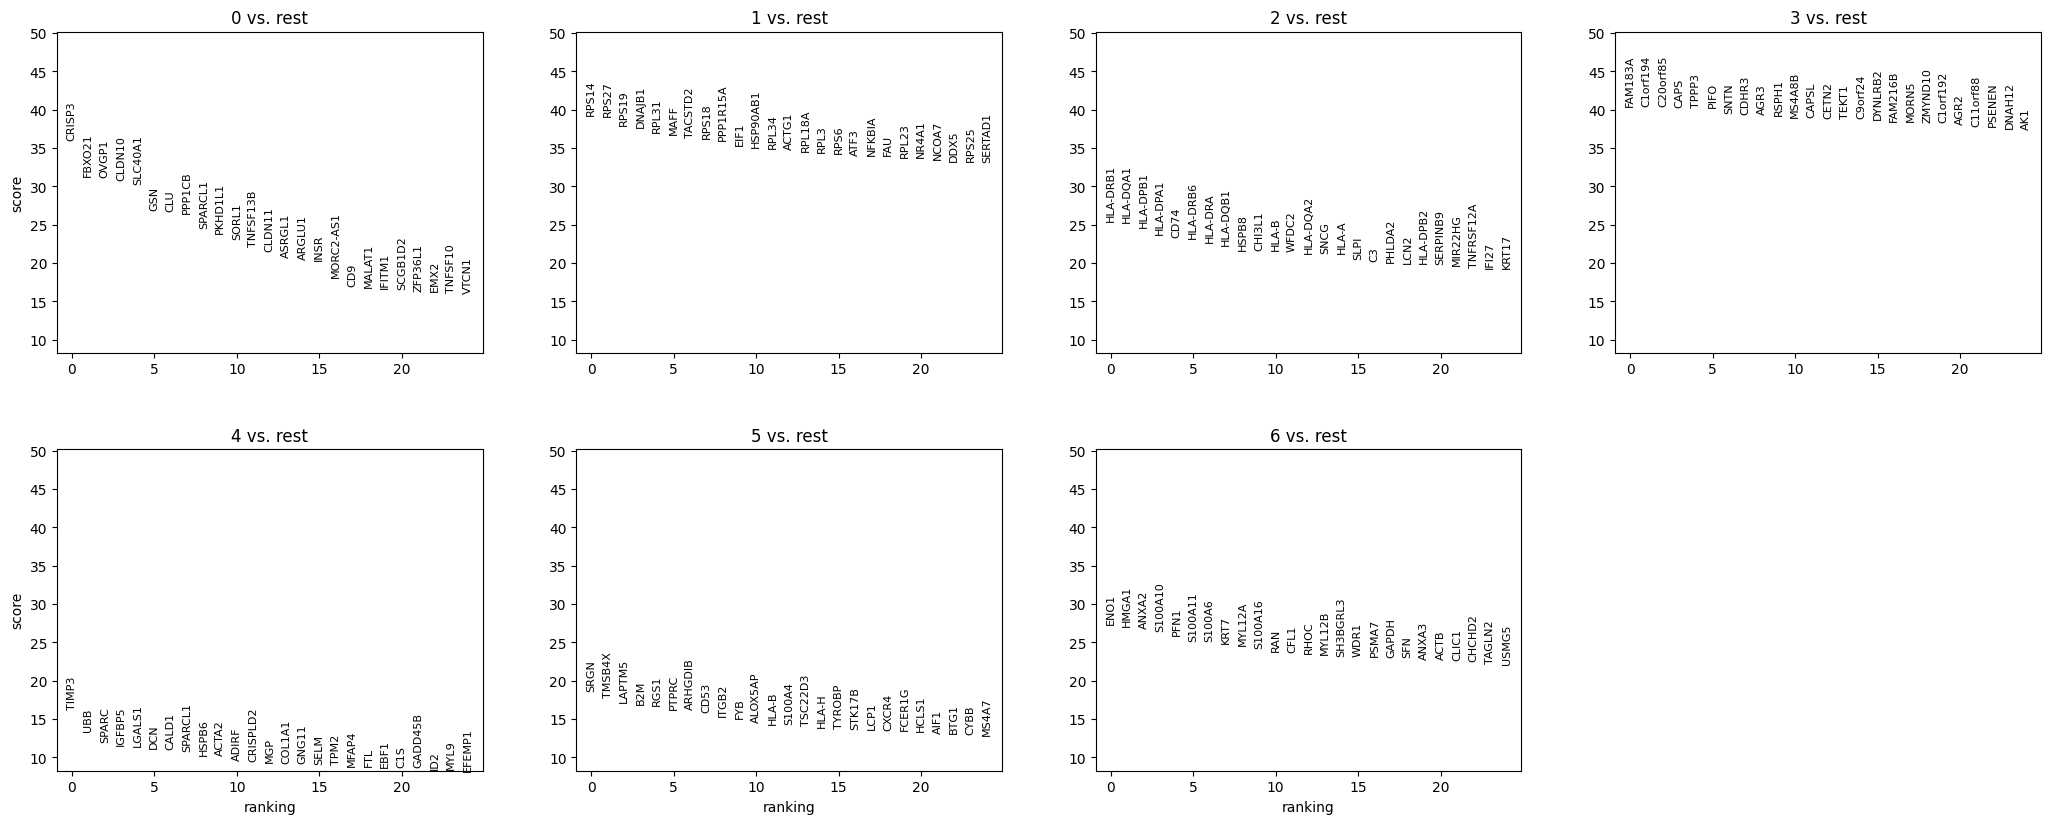

In [93]:
sc.tl.rank_genes_groups(hu,'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(hu, n_genes=25)

**3. Plot top 20 differentially expressed genes in a heatmap**

* sc.pl.rank_genes_groups_heatmap(data, n_genes=20, swap_axes=True, show_gene_labels=False, vmin=-3, vmax=3 )

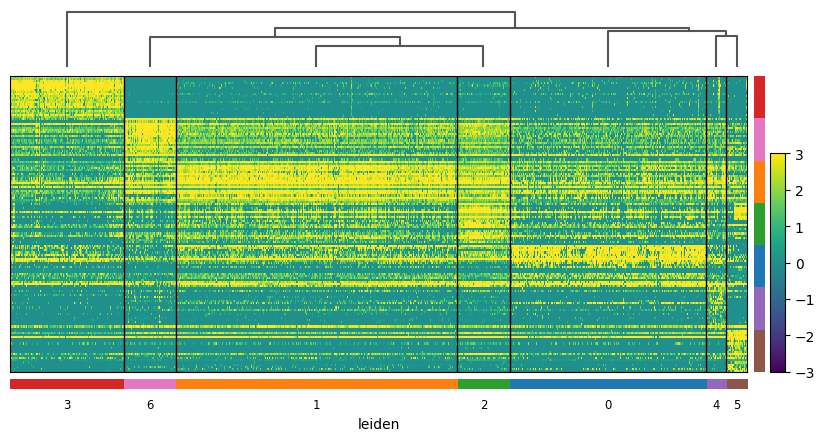

In [94]:
sc.pl.rank_genes_groups_heatmap(hu, n_genes=20, swap_axes=True, show_gene_labels=False, vmin=-3, vmax=3 )

**4. Visualise marker genes to determine the cell types present in each cluster**

Secretory Epithelial : OVGP1

Ciliated Epithelial : FOXJ1, PIFO

Immune: PTPRC

Fibroblast: COL1A1, DCN

STIC lesion : KRT17


* sc.pl.violin(data, ['EPCAM','OVGP1','...'], groupby = 'leiden')


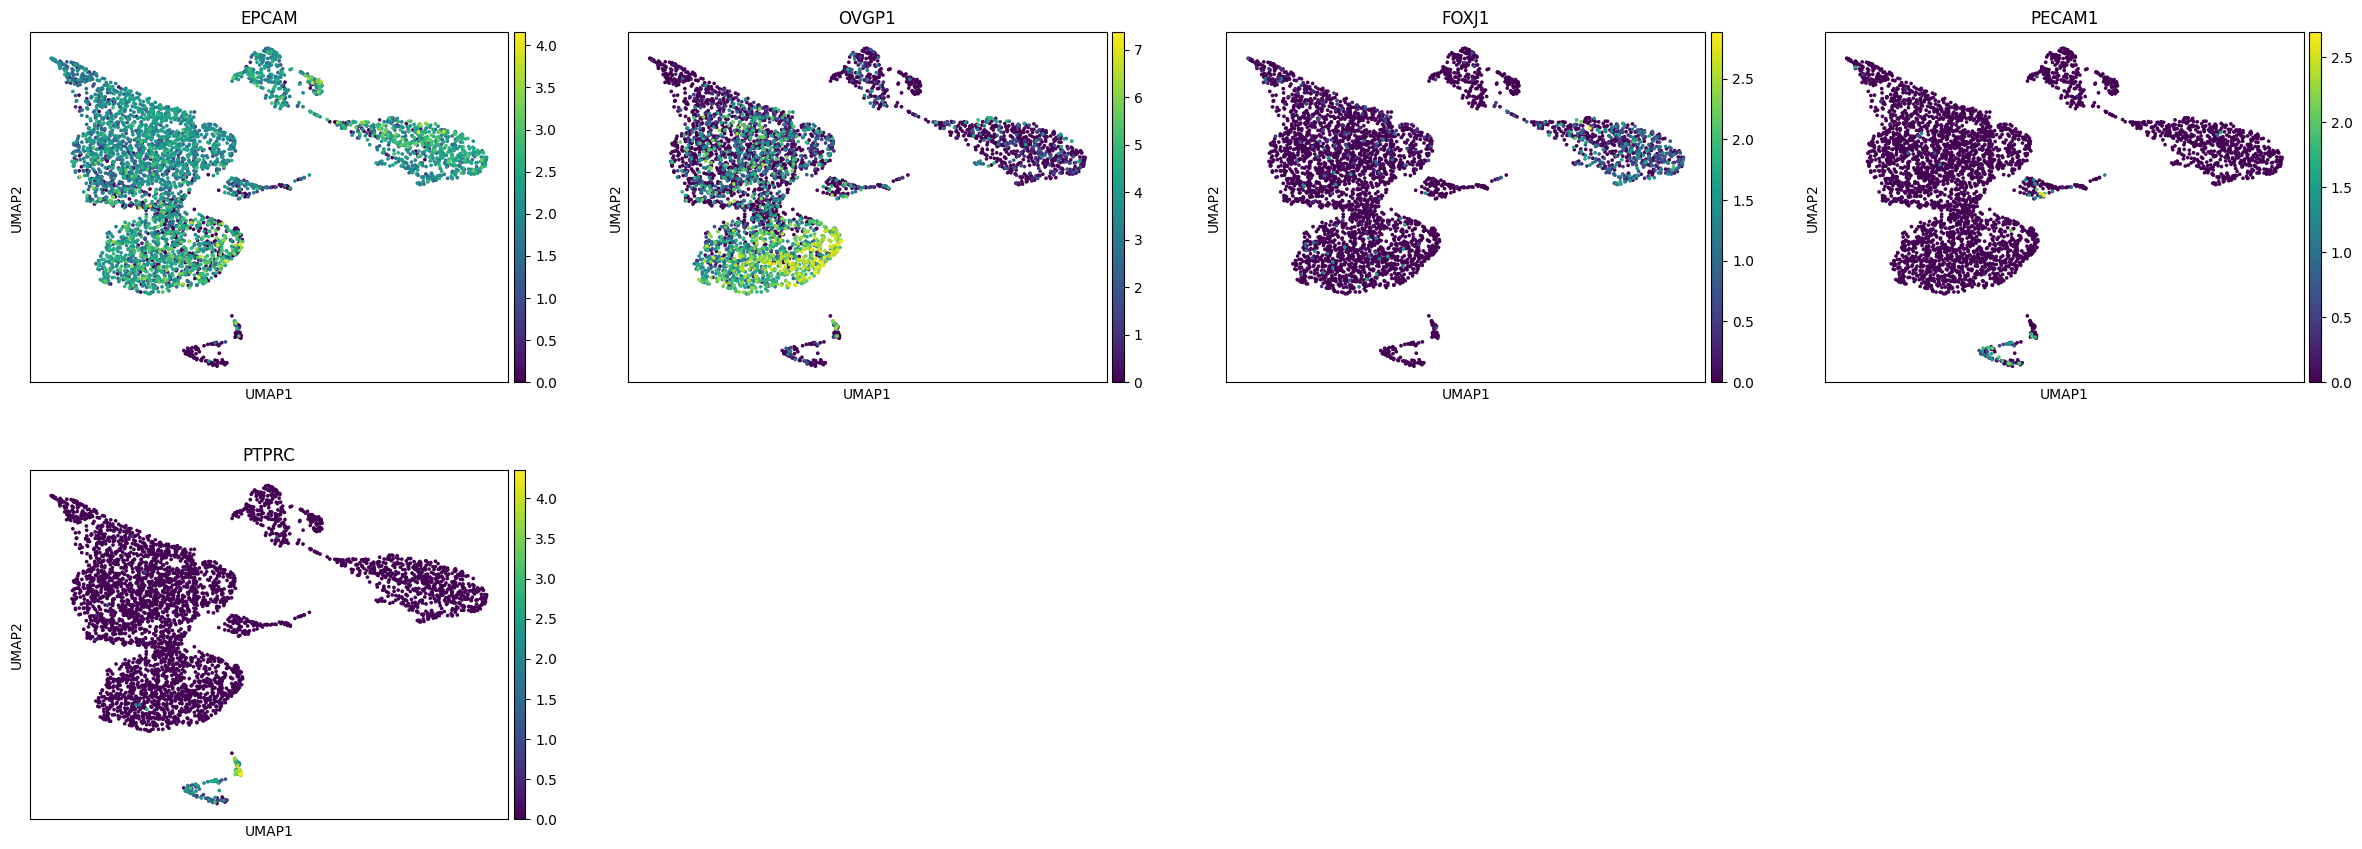

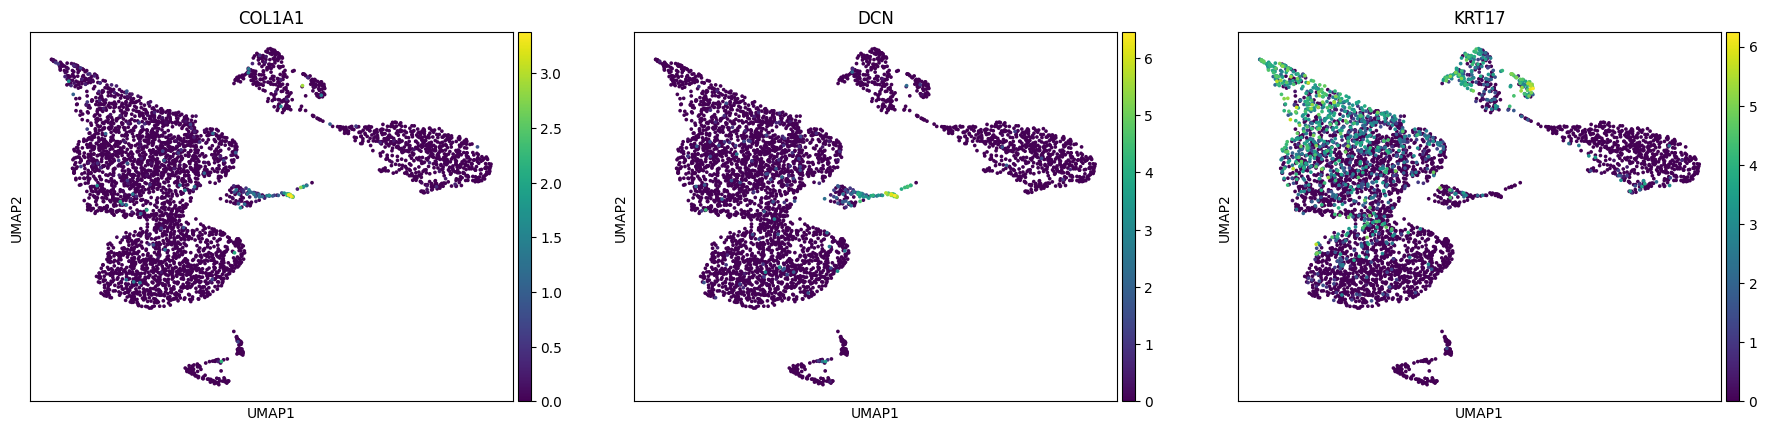

In [95]:
sc.pl.umap(hu, color=['EPCAM','OVGP1','FOXJ1','PECAM1','PTPRC'])
sc.pl.umap(hu, color=['COL1A1','DCN','KRT17'])


**5. From these markers, it is still unclear what cell types some of the leiden clusters are**

Look up some of the top marker genes for these clusters to determine what cell types they are.

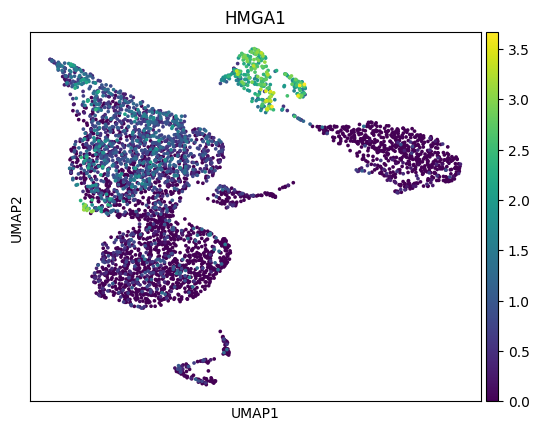

In [96]:
sc.pl.umap(hu, color=['HMGA1'])

**6. Create a dictionary defining Leiden clusters and their respective cell type**

Create a new .obs column to store the cell types , and map this to leiden clusters using the dictionary,

Which cluster represents high grade carcinoma cells?

```
celltypedict = {
        '0' : 'Secretory Epithelial',
        '1' : 'Fibroblast' }

data.obs['Celltype'] = hu.obs['leiden'].map(celltypedict)


In [97]:
celltypedict = {
        '0' : 'Secretory Epithelial-1',
        '1' : 'Secretory Epithelial-2',
        '2' : 'STIC lesion',
        '3' : 'Ciliated Epithelial',
        '4' : 'Fibroblast',
        '5' : 'Immune',
        '6' : 'High Grade Carcinoma',
         }

hu.obs['Celltype'] = hu.obs['leiden'].map(celltypedict)

**7. Plot a UMAP colored by cell types**

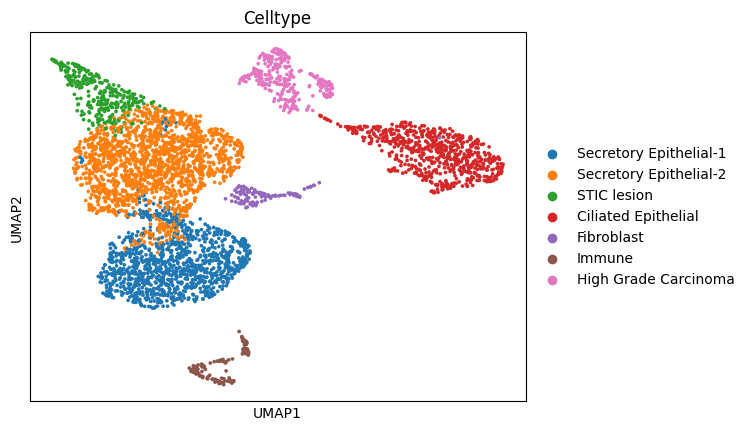

In [98]:
sc.pl.umap(hu, color=['Celltype'])

## **6. Querying GWAS catalog API**


As these women were diagnosed with ovarian cancers, we can use the GWAS catalog to look at the expression of genes associated with epithelial carcinomas

Use the packages: 'requests' and 'json'

Make a get request to the API for the association data from study no. GCST003588, the https address to use is "https://www.ebi.ac.uk/gwas/rest/api/studies/GCST003588/associations"





**3. We can use the GWAS catalog obtain a list of genes associated with high grade serous ovarian carcinoma**


In [99]:
import requests
import json

In [100]:
response=requests.get("https://www.ebi.ac.uk/gwas/rest/api/studies/GCST003588/associations")
response.json()

{'_embedded': {'associations': [{'riskFrequency': 'NR',
    'pvalueDescription': '(subset analysis)',
    'pvalueMantissa': 5,
    'pvalueExponent': -10,
    'multiSnpHaplotype': False,
    'snpInteraction': False,
    'snpType': 'novel',
    'standardError': None,
    'range': None,
    'description': None,
    'orPerCopyNum': None,
    'betaNum': None,
    'betaUnit': None,
    'betaDirection': None,
    'loci': [{'haplotypeSnpCount': None,
      'description': 'Single variant',
      'strongestRiskAlleles': [{'riskAlleleName': 'rs186507655-A',
        'riskFrequency': 'NR',
        'genomeWide': False,
        'limitedList': False,
        '_links': {'proxySnps': {'href': 'https://www.ebi.ac.uk/gwas/rest/api/singleNucleotidePolymorphisms/NR{?projection}',
          'templated': True},
         'snp': {'href': 'https://www.ebi.ac.uk/gwas/rest/api/singleNucleotidePolymorphisms/rs186507655{?projection}',
          'templated': True}}}],
      'authorReportedGenes': [{'geneName': 'Inter

**4.Make a Pandas dataframe containing 'riskAlleleName' and 'geneName'**
* If you don't know how to do this, solution is in the 'geneIdsjson.py' file in the Github repository

In [101]:
associations_data = response.json()['_embedded']['associations']
gwas = pd.json_normalize(associations_data, 'loci')
risk_alleles = gwas.explode('strongestRiskAlleles').explode('authorReportedGenes').reset_index(drop=True)

In [102]:
risk_alleles_df = pd.json_normalize(risk_alleles['strongestRiskAlleles'])
reportedgenes_df = pd.json_normalize(risk_alleles['authorReportedGenes'])


In [103]:
gwasgenes=pd.concat([risk_alleles_df, reportedgenes_df], axis=1)
gwasgenes = gwasgenes[['riskAlleleName', 'geneName']]
gwasgenes


riskAlleleName    geneName
0   rs186507655-A  Intergenic
1     rs2075570-T        MTX1
2      rs481519-T       NEK10
3     rs7679673-A  Intergenic
4     rs7725218-A        TERT
5     rs1862626-T  Intergenic
6   rs147680653-G  Intergenic
7   rs115707823-A  Intergenic
8   rs115392158-G       HLA-C
9   rs147527678-C  Intergenic
10    rs1011970-T      CDKN2B
11    rs1011970-T         AS1
12   rs11200014-A       FGFR2
13    rs7931342-G  Intergenic
14  rs148883465-G  Intergenic
15   rs11168936-C      TUBA1C
16   rs73110464-T        KRT8
17    rs3184504-C       SH2B3
18   rs11571818-C       BRCA2
19   rs11844632-A      RAD51B
20   rs12601991-T       HNF1B
21    rs4808075-C      BABAM1
22   rs11907546-T  Intergenic
23  rs141752671-G  Intergenic
24   rs11065979-T  Intergenic
25    rs2300206-C        RALY
26   rs56084662-A         FRY

**5. To plot the gene expression of carcinoma GWAS genes, convert this to a list**

In [104]:
genes=[gene for gene in gwasgenes['geneName'].tolist() if gene !='Intergenic']

In [105]:
genes

['MTX1',
 'NEK10',
 'TERT',
 'HLA-C',
 'CDKN2B',
 'AS1',
 'FGFR2',
 'TUBA1C',
 'KRT8',
 'SH2B3',
 'BRCA2',
 'RAD51B',
 'HNF1B',
 'BABAM1',
 'RALY',
 'FRY']

In [106]:
genes=['MTX1',
 'NEK10',
 'TERT',
 'HLA-C',
 'CDKN2B',
 'FGFR2',
 'TUBA1C',
 'KRT8',
 'SH2B3',
 'BRCA2',
 'RAD51B',
 'HNF1B',
 'BABAM1',
 'RALY',
 'FRY']

**6. Plot gene expression of Carcinoma GWAS genes per leiden cluster in a dot plot**
* sc.pl.dotplot()


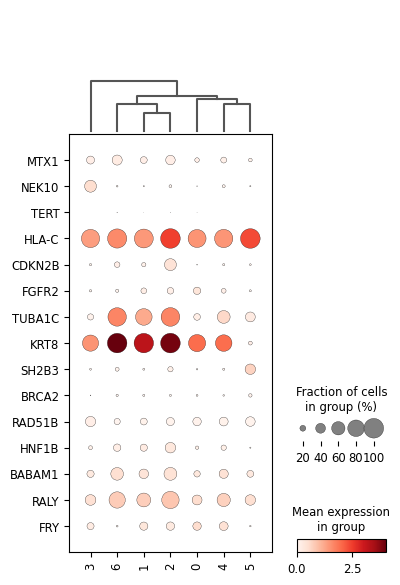

In [107]:
sc.pl.dotplot(hu, genes, groupby='leiden', swap_axes=True, dendrogram=True, use_raw=True)

**7. Plot gene expression of the highly expressed carcinoma GWAS genes in a UMAP, compare this to a UMAP of Disease Stage**

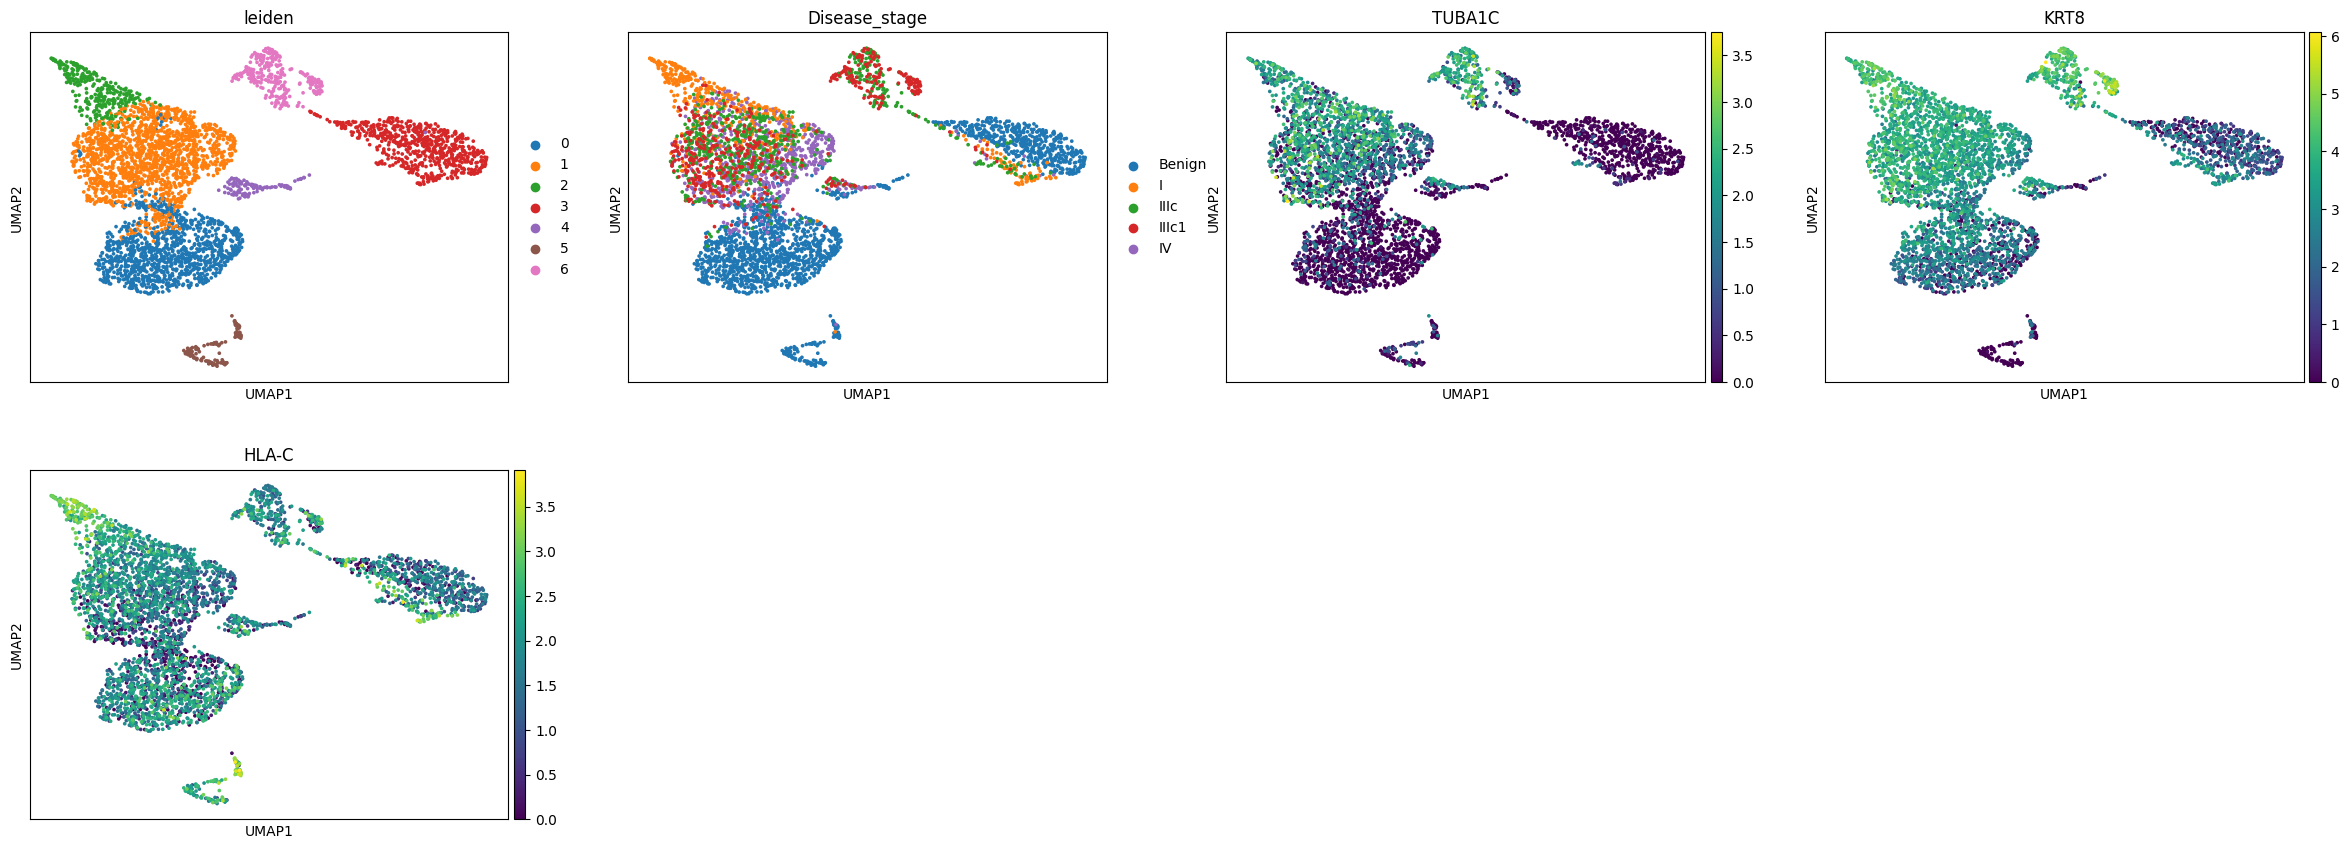

In [108]:
sc.pl.umap(hu, color=['leiden','Disease_stage','TUBA1C','KRT8','HLA-C'])

In [109]:
hu.write_csvs('/content/drive/MyDrive/datascience_course/', skip_data=False)

In [110]:
hu

AnnData object with n_obs × n_vars = 4230 × 5851
    obs: 'Patient', 'Author', 'Tissue', 'Disease_stage', 'Age', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'Celltype'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'Patient_colors', 'neighbors', 'umap', 'Tissue_colors', 'Age_colors', 'Disease_stage_colors', 'leiden', 'leiden_colors', 'rank_genes_groups', 'dendrogram_leiden', 'Celltype_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

## **6. Subsetting secretory epithelial cells**
As HGOC is thought to originate from epithelial cells in the fallopian tube, we can examine epithelial cells in greater depth by creating a subset of the data of epithelial cells.

**1. Create new object of a subset of epithelial cell data**
* subset = data[data.obs['Celltype'].isin([''])]

In [55]:
secretory = hu[hu.obs['Celltype'].isin(['Secretory Epithelial-1','Secretory Epithelial-2','STIC lesion'])]

**2. Run the dimensionality reduction and clustering analysis again to identify clusters of epitheilal cells**

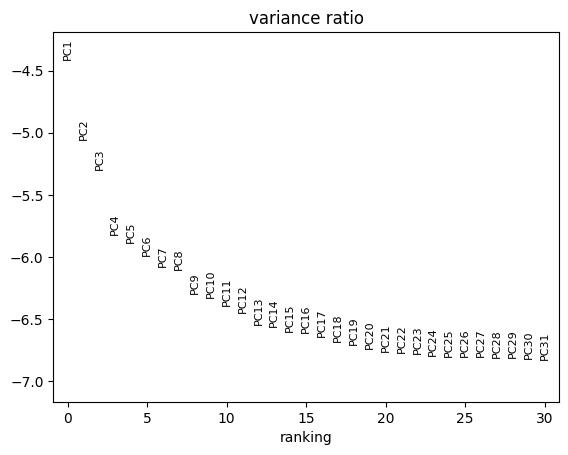

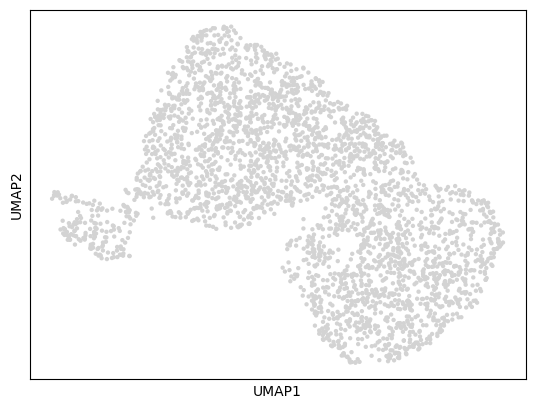

In [60]:
secretory
sc.tl.pca(secretory)
sc.pl.pca_variance_ratio(secretory, log=True)
sc.pp.neighbors(secretory, n_pcs=4)
sc.tl.umap(secretory)
sc.pl.umap(secretory)

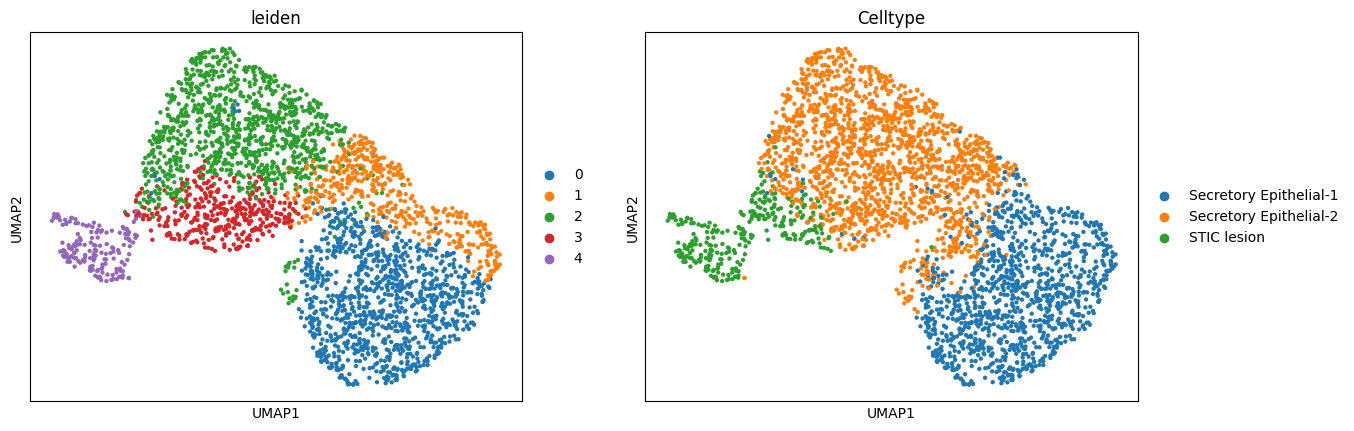

In [71]:
sc.tl.leiden(secretory, resolution=0.2,flavor="igraph")
sc.pl.umap(secretory, color=['leiden','Celltype'])

In [74]:
pd.DataFrame(secretory.uns["rank_genes_groups"]["names"]).head(25)

0             1         2          3          4
0        SLC40A1         RPS14  PPP1R15A       SOD2   HLA-DPB1
1         PPP1CB         RPS11  HSP90AB1      PLAUR   HLA-DRB1
2         FBXO21        RPL18A      CKS2        IL8   HLA-DQA1
3         CRISP3         RPS25      MAFF     CDKN1A      HLA-B
4       TNFSF13B         RPS19     ACTG1      HSPB8         HP
5         CLDN10          RPS6     RPS19      CXCL1   HLA-DPB2
6         CLDN11         RPS18     RPS14    S100A11      HLA-A
7          OVGP1         RPLP0    DNAJB1    ZC3H12A    RARRES1
8      MORC2-AS1         RPL31     RPL36   HLA-DRB1   HLA-DRB6
9         MALAT1         RPS15       FAU    SERTAD1        C1R
10       PKHD1L1          RPL7     RPS27       ACTB   HLA-DPA1
11         SORL1         RPL34     RPL34    TACSTD2       PAEP
12           GSN        RPL10A      DDX5     PHLDA2       CD74
13       SPARCL1         RPL13   SERTAD1   HLA-DPA1     TMSB10
14        ARGLU1         RPS27     CYR61  TNFRSF12A       TGM2
15         TRA2A  C17orf76-AS1     RPL23       DDX5        B2M
16         TXNIP          RPL3   TSC22D2       CFL1      WFDC2
17           CPM          RPL5     RPS18       CCL2      HLA-C
18        ASRGL1         RPL35      ATF3     TMSB10     S100A6
19           CLU         EEF1G      NPM1      BIRC3     CHI3L1
20      KIAA1324          RPL8    EIF4A3       MYL6       SLPI
21          INSR         PFDN5      AMD1       SNCG      HLA-L
22       TNFSF10          RPS8    DNAJA1   HLA-DRB5  TNFRSF12A
23       PIK3IP1         RPS24     RPL31    TNFAIP2   HLA-DQB1
24  LOC100287792         SRP14    RPL35A     S100A6      HLA-G